# 16. Sentiment Analysis of the Spam_NonSpam Dataset

## 16A. Sentiment Analysis by using RNNs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout,LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
df = pd.read_csv('dataset/spam_or_not_spam.csv')
print(df.head())


                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [3]:
X = df['email'].fillna('').values  
y = df['label'].values 

In [4]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
max_vocab_size = 10000  
max_sequence_length = 200 

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [7]:
model = Sequential()

model.add(Embedding(input_dim=max_vocab_size, output_dim=128, input_length=max_sequence_length))
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(SimpleRNN(units=32, activation='relu', return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 1295522 (4.94 MB)
Trainable params: 129552

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=64, validation_data=(X_test_padded, y_test))


Epoch 1/20
38/38 [==============================] - 12s 229ms/step - loss: 0.4199 - accuracy: 0.8292 - val_loss: 0.2568 - val_accuracy: 0.8417
Epoch 2/20
38/38 [==============================] - 8s 220ms/step - loss: 0.2097 - accuracy: 0.8492 - val_loss: 0.1510 - val_accuracy: 0.9433
Epoch 3/20
38/38 [==============================] - 8s 202ms/step - loss: 0.2101 - accuracy: 0.9542 - val_loss: 0.0938 - val_accuracy: 0.9650
Epoch 4/20
38/38 [==============================] - 7s 185ms/step - loss: 0.0699 - accuracy: 0.9771 - val_loss: 0.0628 - val_accuracy: 0.9783
Epoch 5/20
38/38 [==============================] - 7s 181ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0690 - val_accuracy: 0.9833
Epoch 6/20
38/38 [==============================] - 7s 180ms/step - loss: 0.0070 - accuracy: 0.9967 - val_loss: 0.0745 - val_accuracy: 0.9800
Epoch 7/20
38/38 [==============================] - 7s 183ms/step - loss: 0.0034 - accuracy: 0.9979 - val_loss: 0.0909 - val_accuracy: 0.9867
Epoch

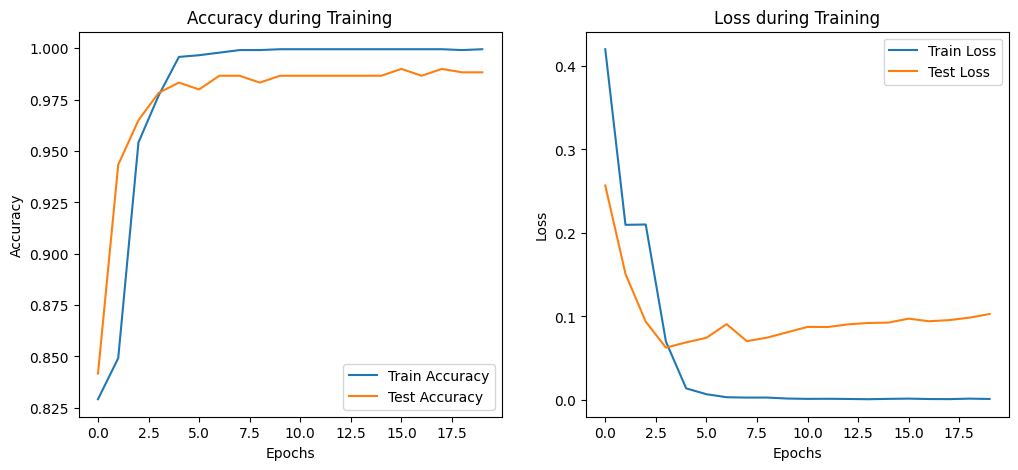

In [10]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [11]:
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

19/19 [==============================] - 2s 56ms/step


In [12]:
y_test_labels = np.argmax(y_test, axis=1)

In [13]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[502   3]
 [  4  91]]


In [14]:
print('Classification Report:')
print(classification_report(y_test_labels, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       505
           1       0.97      0.96      0.96        95

    accuracy                           0.99       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.99      0.99      0.99       600



In [15]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

19/19 [==============================] - 1s 41ms/step - loss: 0.1029 - accuracy: 0.9883
Test Loss: 0.1029
Test Accuracy: 0.9883


In [16]:
sentence = "Congratulations! You have won a free prize, click here to claim your reward." 
sentence = [sentence] 
sequence = tokenizer.texts_to_sequences(sentence)
max_sequence_length=200
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_sequence)

1/1 [==============================] - 0s 77ms/step


In [17]:
predicted_class = np.argmax(prediction, axis=1) 

if predicted_class == 1:
    print("Spam")
else:
   print("Non-Spam")

Spam


In [18]:
sentence = "Dear Ram Kumar, I am Sudipta Sarkar Student of RKMRC" 
sentence = [sentence] 
sequence = tokenizer.texts_to_sequences(sentence)
max_sequence_length=200
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

In [19]:
prediction = model.predict(padded_sequence)

1/1 [==============================] - 0s 61ms/step


In [20]:
predicted_class = np.argmax(prediction, axis=1) 

if predicted_class == 1:
    print("Spam")
else:
   print("Non-Spam")

Non-Spam


## 16B. Sentiment Analysis by using LSTMs

In [21]:
df = pd.read_csv('dataset/spam_or_not_spam.csv')
print(df.head())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [22]:
df['email'] = df['email'].fillna('')
df['email'] = df['email'].astype(str)

In [23]:
X = df['email'].values  
y = df['label'].values  

In [24]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
max_vocab_size = 10000  
max_sequence_length = 200 

In [27]:
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)  
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [51]:
model = Sequential()

model.add(Embedding(input_dim=max_vocab_size, output_dim=128, input_length=max_sequence_length))

model.add(LSTM(16, activation='relu', return_sequences=False))

model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 16)                9280      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1289314 (4.92 MB)
Trainable params: 1289314 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_data=(X_test_padded, y_test))


Epoch 1/10
38/38 [==============================] - 10s 186ms/step - loss: 0.5616 - accuracy: 0.8208 - val_loss: 1.1547 - val_accuracy: 0.8417
Epoch 2/10
38/38 [==============================] - 6s 168ms/step - loss: 13.0110 - accuracy: 0.8288 - val_loss: 0.3060 - val_accuracy: 0.8417
Epoch 3/10
38/38 [==============================] - 6s 167ms/step - loss: 0.3039 - accuracy: 0.8333 - val_loss: 0.2676 - val_accuracy: 0.8417
Epoch 4/10
38/38 [==============================] - 6s 168ms/step - loss: 0.2694 - accuracy: 0.8367 - val_loss: 0.2397 - val_accuracy: 0.8433
Epoch 5/10
38/38 [==============================] - 6s 167ms/step - loss: 0.2361 - accuracy: 0.8404 - val_loss: 0.2122 - val_accuracy: 0.8500
Epoch 6/10
38/38 [==============================] - 6s 167ms/step - loss: 66.5737 - accuracy: 0.8625 - val_loss: 0.3044 - val_accuracy: 0.8817
Epoch 7/10
38/38 [==============================] - 6s 168ms/step - loss: 0.2937 - accuracy: 0.8900 - val_loss: 0.2721 - val_accuracy: 0.8900
Epo

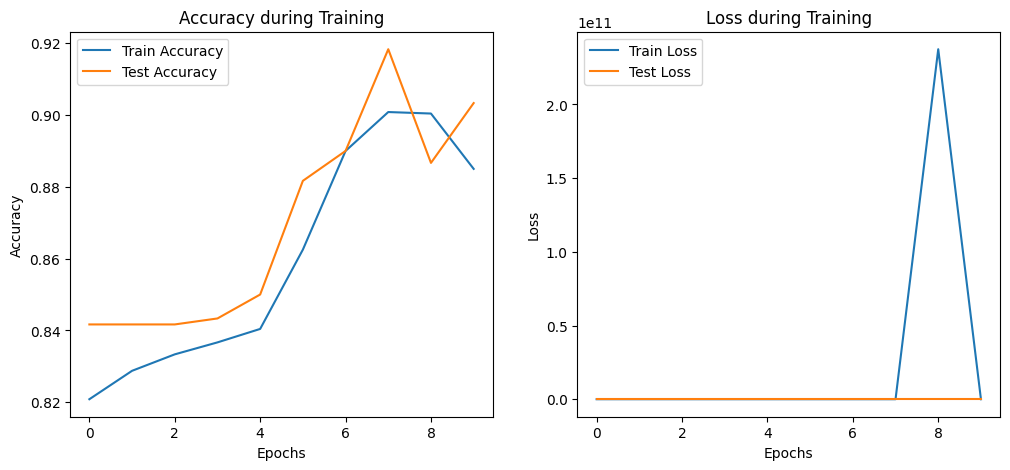

In [54]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [55]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

19/19 [==============================] - 1s 39ms/step - loss: 5.6680 - accuracy: 0.9033
Test Loss: 5.6680
Test Accuracy: 0.9033


In [56]:
y_pred_prob = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1) 
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

19/19 [==============================] - 1s 44ms/step
Confusion Matrix:
[[505   0]
 [ 58  37]]


In [57]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Non-Spam", "Spam"]))


Classification Report:
              precision    recall  f1-score   support

    Non-Spam       0.90      1.00      0.95       505
        Spam       1.00      0.39      0.56        95

    accuracy                           0.90       600
   macro avg       0.95      0.69      0.75       600
weighted avg       0.91      0.90      0.88       600



In [58]:
sentence = "Congratulations! You have won a free prize, click here to claim your reward." 
sentence = [sentence] 
sequence = tokenizer.texts_to_sequences(sentence)
max_sequence_length=200
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_sequence)

1/1 [==============================] - 0s 62ms/step


In [59]:
predicted_class = np.argmax(prediction, axis=1) 

if predicted_class == 1:
    print("Spam")
else:
   print("Non-Spam")

Non-Spam


In [60]:
sentence = "Dear Ram Kumar, I am Sudipta Sarkar Student of RKMRC" 
sentence = [sentence] 
sequence = tokenizer.texts_to_sequences(sentence)
max_sequence_length=200
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_sequence)

1/1 [==============================] - 0s 61ms/step


In [61]:
predicted_class = np.argmax(prediction, axis=1) 

if predicted_class == 1:
    print("Spam")
else:
   print("Non-Spam")

Non-Spam
